In [69]:
import pandas as pd
import os
import missingno as mn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,root_mean_squared_error, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge,HuberRegressor,RANSACRegressor,ElasticNet

In [2]:
df = pd.read_csv('C:/Users/Shankar/jupyter notes/LR PROJECT.csv')
df

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388
...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,NaN,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


In [4]:
df['date']=pd.to_datetime(df['date'])

In [5]:
df.isnull().sum()/122400 * 100

video_id                0.000000
date                    0.000000
views                   0.000000
likes                   4.997549
comments                4.993464
watch_time_minutes      4.987745
video_length_minutes    0.000000
subscribers             0.000000
category                0.000000
device                  0.000000
country                 0.000000
ad_revenue_usd          0.000000
dtype: float64

<Axes: >

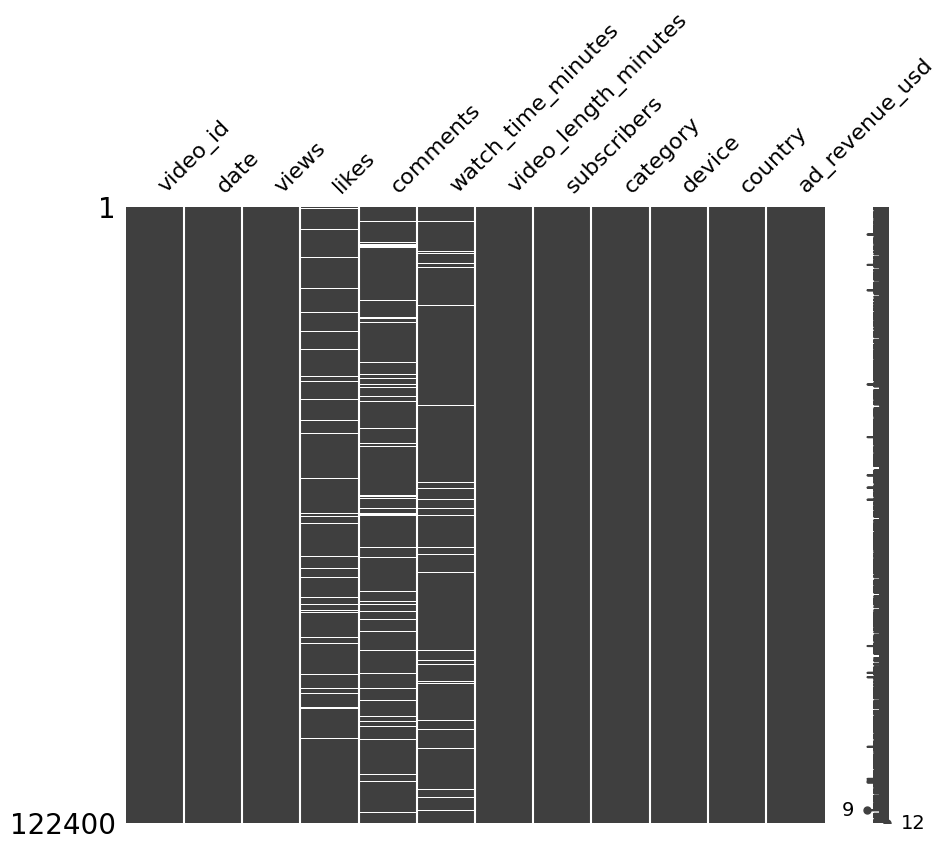

In [6]:
mn.matrix(df, figsize=(10,8))

In [7]:
df1=df.copy()

In [8]:
print(df1.duplicated().sum()) 

df1 = df1.drop_duplicates()
print(df1)

2400
        video_id                       date  views   likes  comments  \
0       vid_3092 2024-09-24 10:50:40.993199   9936  1221.0     320.0   
1       vid_3459 2024-09-22 10:50:40.993199  10017   642.0     346.0   
2       vid_4784 2024-11-21 10:50:40.993199  10097  1979.0     187.0   
3       vid_4078 2025-01-28 10:50:40.993199  10034  1191.0     242.0   
4       vid_3522 2025-04-28 10:50:40.993199   9889  1858.0     477.0   
...          ...                        ...    ...     ...       ...   
122395  vid_2902 2024-12-14 10:50:40.993199   9853  1673.0     147.0   
122396  vid_3890 2024-07-13 10:50:40.993199  10128  1709.0      63.0   
122397  vid_3934 2024-06-10 10:50:40.993199  10267   700.0       NaN   
122398  vid_4260 2024-12-22 10:50:40.993199  10240  1616.0     106.0   
122399  vid_1056 2024-06-25 10:50:40.993199   9931   770.0       NaN   

        watch_time_minutes  video_length_minutes  subscribers       category  \
0             26497.214184              2.862137  

In [9]:
median_likes = df1['likes'].median()
print(median_likes)

1102.0


In [10]:
df1['likes'] = df1['likes'].fillna(median_likes)

In [11]:
median_comments = df1['comments'].median()
print(median_comments)

274.0


In [12]:
df1['comments'] = df1['comments'].fillna(median_comments)

In [13]:
median_watchtime = df1['watch_time_minutes'].median()
print(median_watchtime)

37522.22120523364


In [14]:
df1['watch_time_minutes'] = df1['watch_time_minutes'].fillna(median_watchtime)

<Axes: >

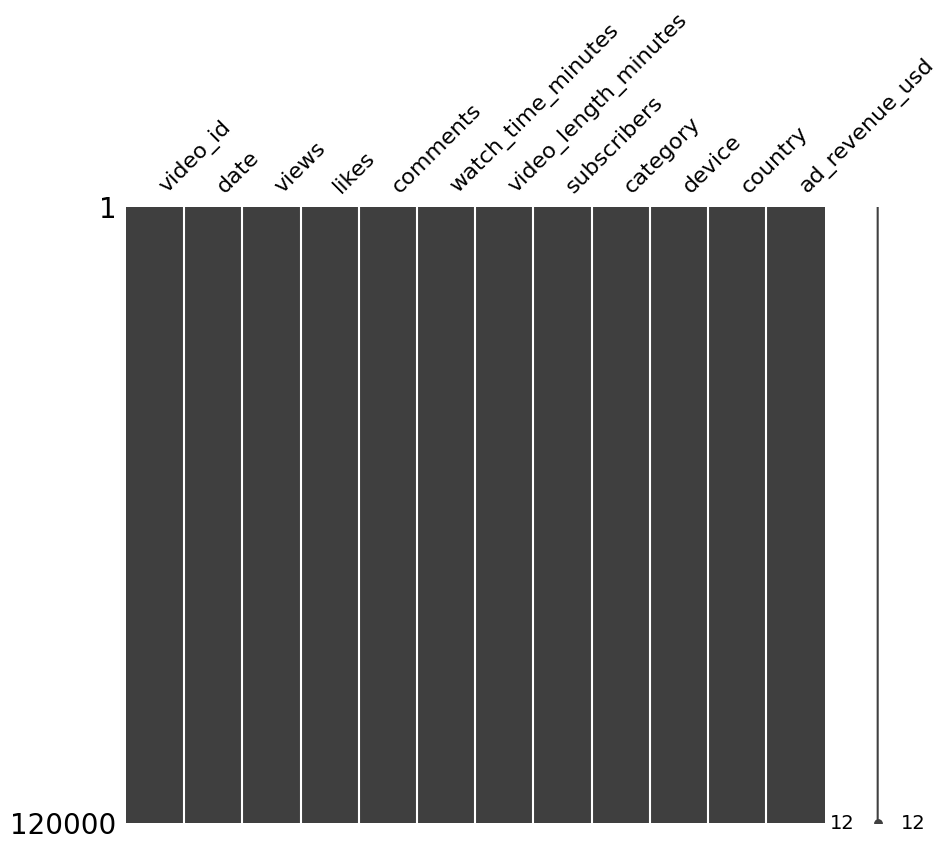

In [15]:
mn.matrix(df1, figsize=(10,8))

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   video_id              120000 non-null  object        
 1   date                  120000 non-null  datetime64[ns]
 2   views                 120000 non-null  int64         
 3   likes                 120000 non-null  float64       
 4   comments              120000 non-null  float64       
 5   watch_time_minutes    120000 non-null  float64       
 6   video_length_minutes  120000 non-null  float64       
 7   subscribers           120000 non-null  int64         
 8   category              120000 non-null  object        
 9   device                120000 non-null  object        
 10  country               120000 non-null  object        
 11  ad_revenue_usd        120000 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory us

In [17]:
df1['category'].value_counts()

category
Education        20123
Music            20065
Tech             20028
Entertainment    20025
Gaming           19974
Lifestyle        19785
Name: count, dtype: int64

In [18]:
df1['device'].value_counts()

device
TV         30086
Mobile     29989
Desktop    29984
Tablet     29941
Name: count, dtype: int64

In [19]:
df1['country'].value_counts()


country
CA    20198
DE    20160
IN    20156
AU    19911
UK    19893
US    19682
Name: count, dtype: int64

In [20]:
df1['engagement rate'] = (df1['likes'] + df1['comments']) / df1['views']

In [21]:
df1

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement rate
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,0.155093
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,0.098632
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,0.214519
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,0.142814
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,0.236121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396,0.184715
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981,0.174961
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,274.0,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106,0.094867
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811,0.168164


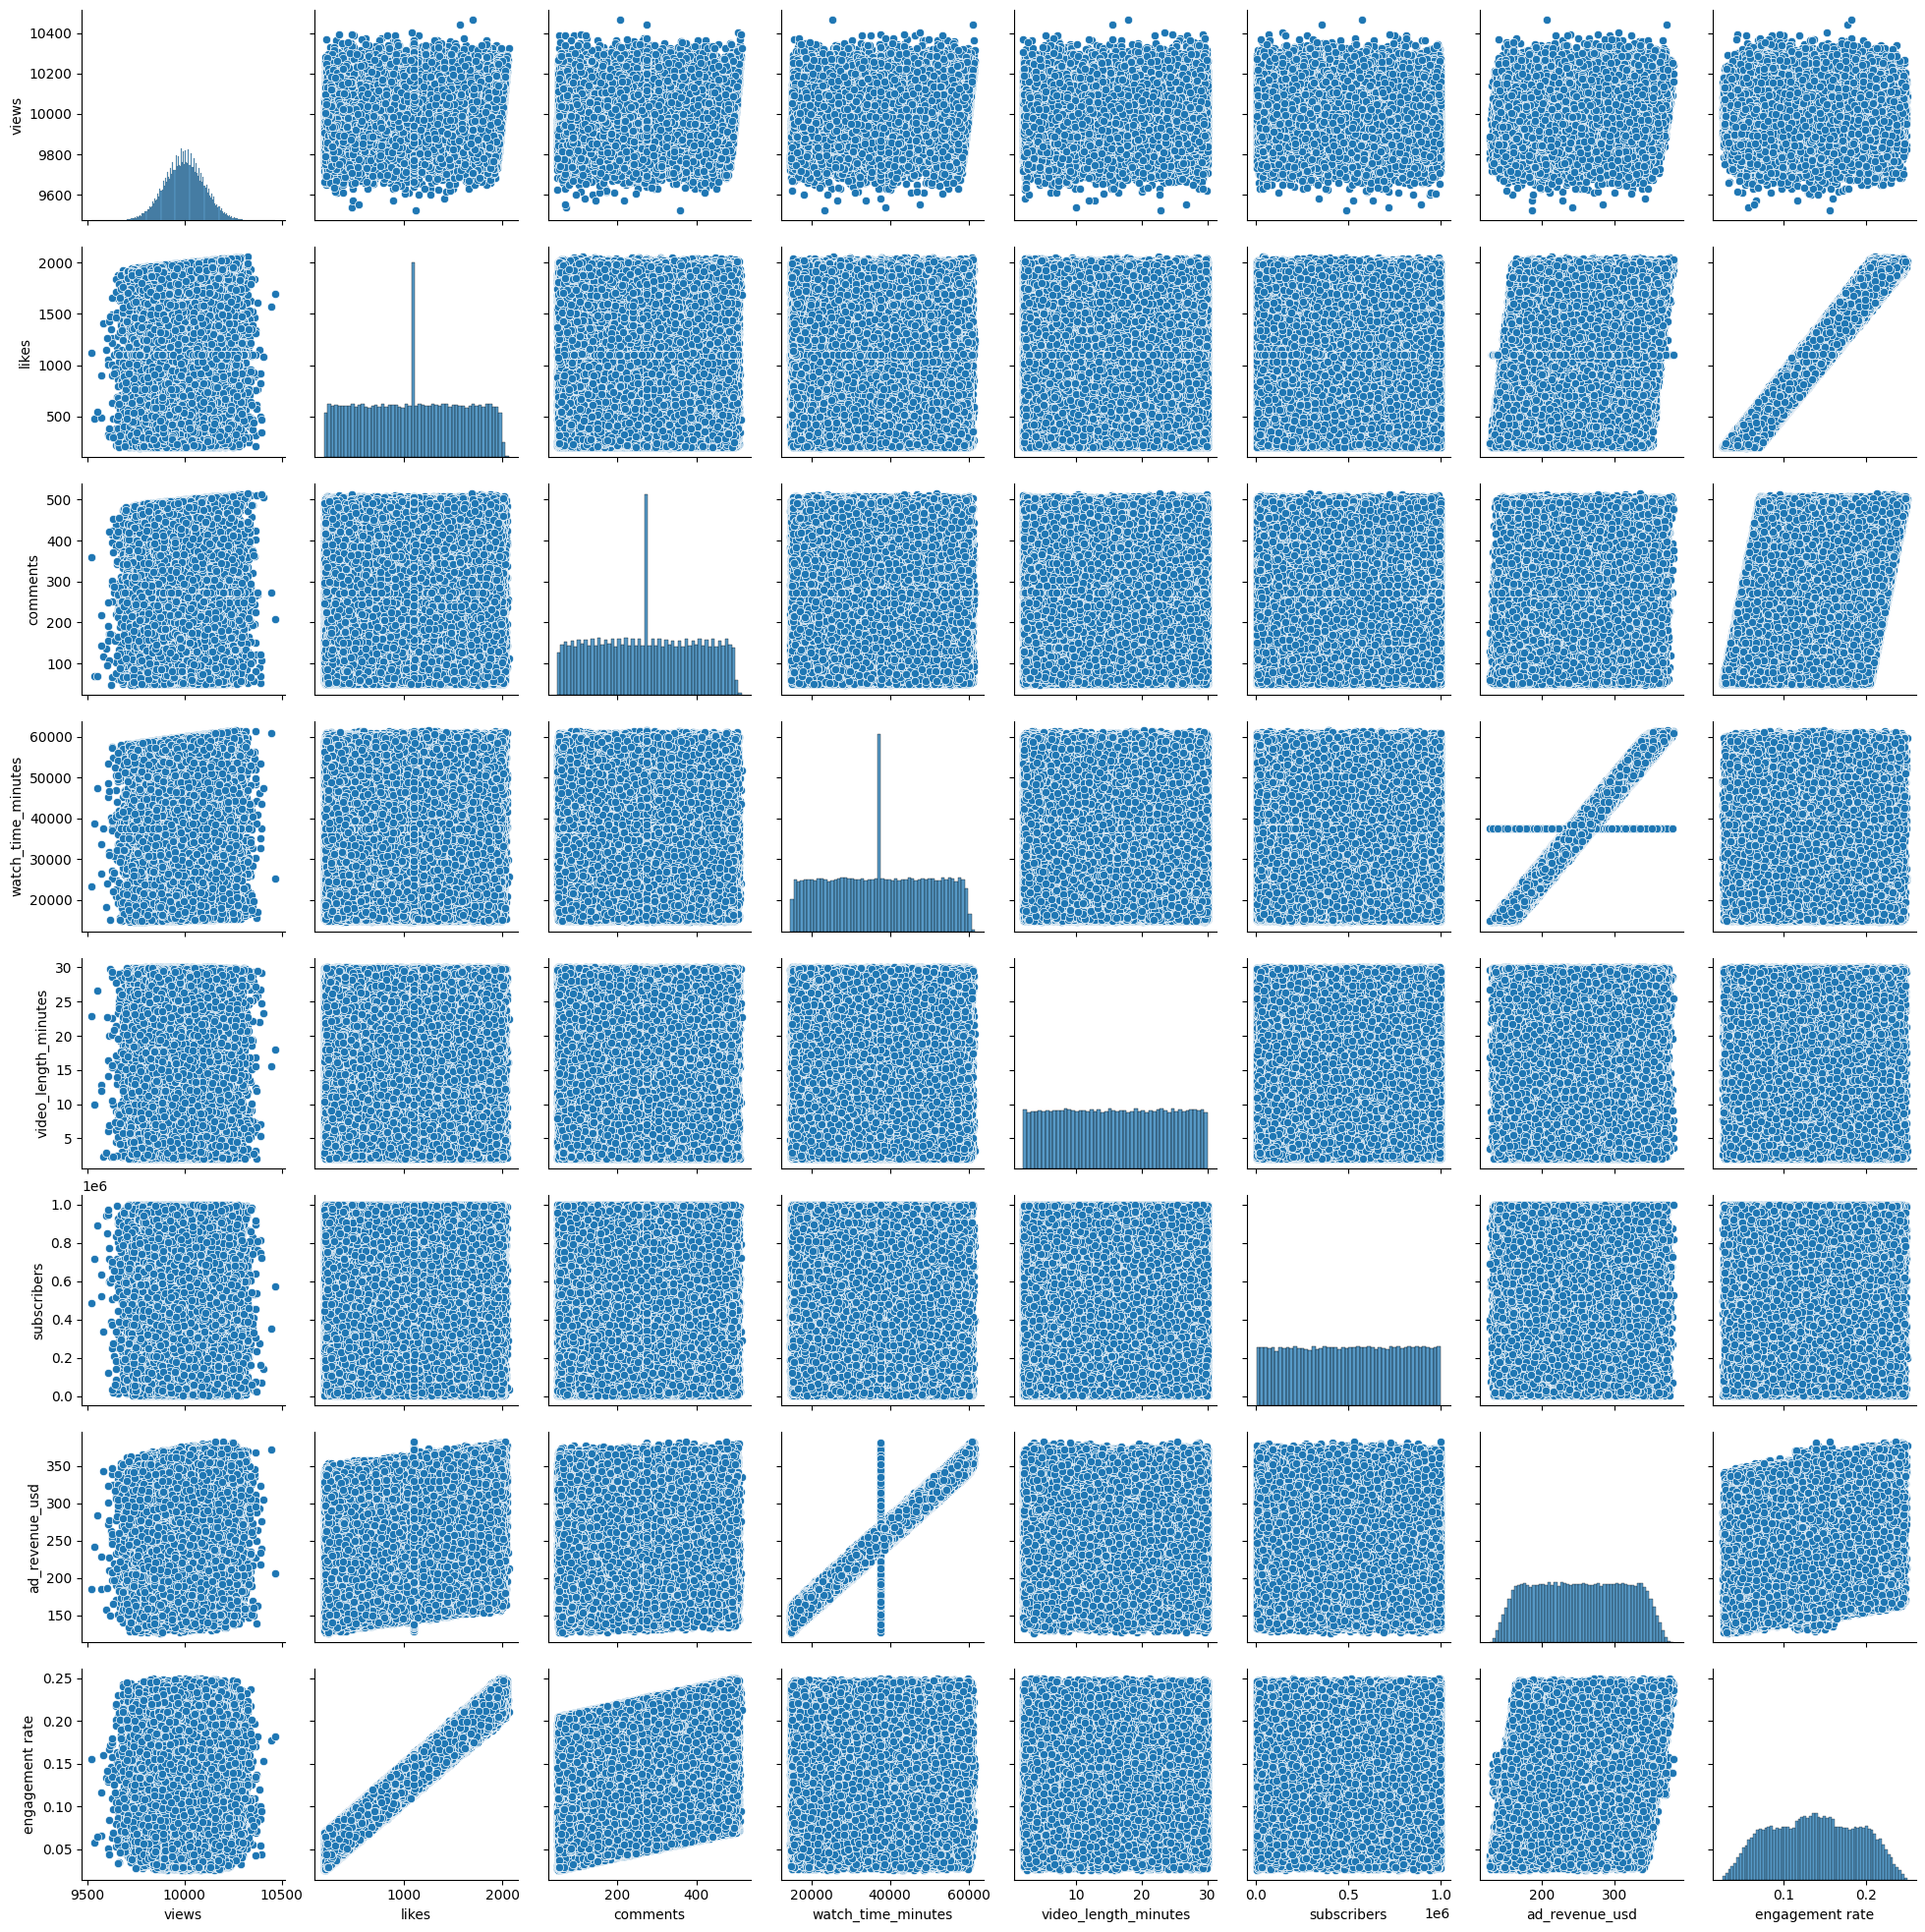

In [22]:
sns.pairplot(df1)

In [23]:
df1.skew(numeric_only=True)

views                  -0.002912
likes                  -0.002975
comments                0.008859
watch_time_minutes      0.001790
video_length_minutes   -0.001861
subscribers            -0.009575
ad_revenue_usd          0.000948
engagement rate        -0.006336
dtype: float64

In [24]:
df1.kurt(numeric_only=True)

views                   0.015718
likes                  -1.101795
comments               -1.098689
watch_time_minutes     -1.100090
video_length_minutes   -1.202837
subscribers            -1.197619
ad_revenue_usd         -1.140445
engagement rate        -0.981002
dtype: float64

<Axes: >

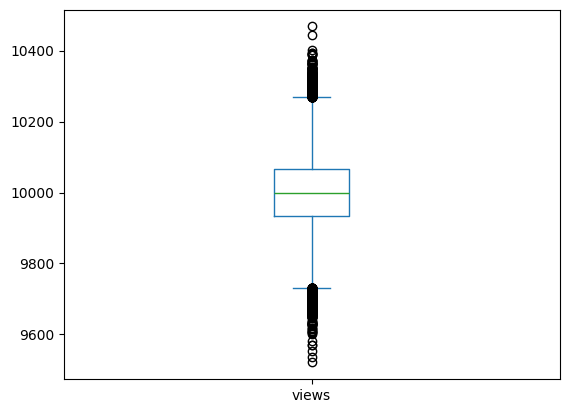

In [25]:
df1['views'].plot(kind='box')

In [26]:
df2 = df1.select_dtypes(include='number').corr()

<Axes: >

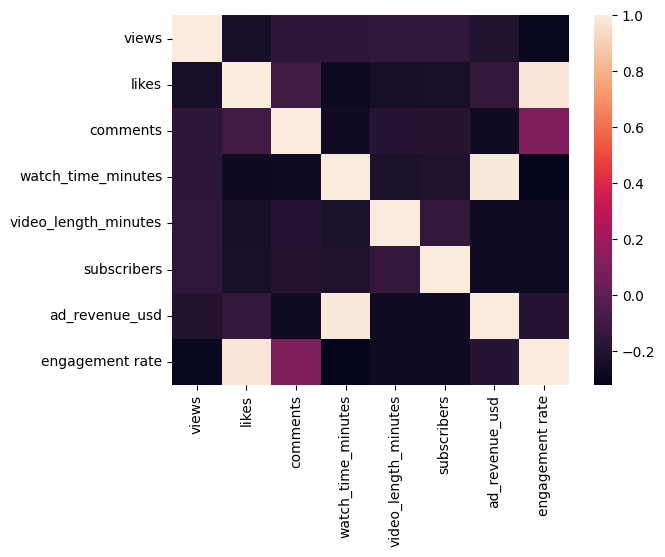

In [27]:
sns.heatmap(df2.corr())

In [28]:
df1

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd,engagement rate
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237,0.155093
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508,0.098632
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008,0.214519
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261,0.142814
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388,0.236121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,vid_2902,2024-12-14 10:50:40.993199,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,280.986396,0.184715
122396,vid_3890,2024-07-13 10:50:40.993199,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,354.612981,0.174961
122397,vid_3934,2024-06-10 10:50:40.993199,10267,700.0,274.0,27549.714659,23.822365,576756,Tech,Tablet,CA,203.643106,0.094867
122398,vid_4260,2024-12-22 10:50:40.993199,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,351.525811,0.168164


In [51]:
X = df1.drop(columns=['ad_revenue_usd', 'video_id', 'date'])
y = df1['ad_revenue_usd']


In [52]:
X

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,engagement rate
0,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,0.155093
1,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,0.098632
2,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,0.214519
3,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,0.142814
4,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,0.236121
...,...,...,...,...,...,...,...,...,...,...
122395,9853,1673.0,147.0,42075.704885,25.490195,210818,Education,Tablet,US,0.184715
122396,10128,1709.0,63.0,57563.703040,16.229133,878860,Music,Desktop,UK,0.174961
122397,10267,700.0,274.0,27549.714659,23.822365,576756,Tech,Tablet,CA,0.094867
122398,10240,1616.0,106.0,56967.384382,7.753099,585138,Music,Mobile,UK,0.168164


In [53]:
y

0         203.178237
1         140.880508
2         360.134008
3         224.638261
4         165.514388
             ...    
122395    280.986396
122396    354.612981
122397    203.643106
122398    351.525811
122399    253.842824
Name: ad_revenue_usd, Length: 120000, dtype: float64

In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cat_cols = ['category', 'device', 'country']
num_cols = X.select_dtypes(include='number').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)


In [55]:
X_encoded = preprocessor.fit_transform(X)


In [56]:
X_encoded

array([[9.9360e+03, 1.2210e+03, 3.2000e+02, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0017e+04, 6.4200e+02, 3.4600e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0097e+04, 1.9790e+03, 1.8700e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0267e+04, 7.0000e+02, 2.7400e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0240e+04, 1.6160e+03, 1.0600e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [9.9310e+03, 7.7000e+02, 2.7400e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], shape=(120000, 20))

In [57]:
# Get feature names
num_features = num_cols
cat_features = preprocessor.named_transformers_['cat'] \
                            .get_feature_names_out(cat_cols)

all_features = list(num_features) + list(cat_features)

# Convert to DataFrame
X_encoded_df = pd.DataFrame(
    X_encoded.toarray() if hasattr(X_encoded, "toarray") else X_encoded,
    columns=all_features
)

X_encoded_df.head()


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,engagement rate,category_Entertainment,category_Gaming,category_Lifestyle,category_Music,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US
0,9936.0,1221.0,320.0,26497.214184,2.862137,228086.0,0.155093,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10017.0,642.0,346.0,15209.747445,23.738069,736015.0,0.098632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,10097.0,1979.0,187.0,57332.658498,26.200634,240534.0,0.214519,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10034.0,1191.0,242.0,31334.517771,11.770340,434482.0,0.142814,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9889.0,1858.0,477.0,15665.666434,6.635854,42030.0,0.236121,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [58]:
has_nan = X_encoded_df.isna().any().any()  # True/False
print(has_nan)  # False for your clean numeric data

# Total NaN count
total_nan = X_encoded_df.isna().sum().sum()
print(f"Total NaNs: {total_nan}") 

False
Total NaNs: 0


In [59]:
# NaN count per column
nan_counts = X_encoded_df.isna().sum()
print(nan_counts)
# views                 0
# likes                 0
# ad_revenue_usd        0
# ... (all zeros)

# Columns with ANY NaN
nan_cols = X_encoded_df.columns[X_encoded_df.isna().any()].tolist()
print(nan_cols)  # [] - empty list


views                     0
likes                     0
comments                  0
watch_time_minutes        0
video_length_minutes      0
subscribers               0
engagement rate           0
category_Entertainment    0
category_Gaming           0
category_Lifestyle        0
category_Music            0
category_Tech             0
device_Mobile             0
device_TV                 0
device_Tablet             0
country_CA                0
country_DE                0
country_IN                0
country_UK                0
country_US                0
dtype: int64
[]


In [50]:
print(df1.isna().sum() / len(df) * 100)

video_id                0.0
date                    0.0
views                   0.0
likes                   0.0
comments                0.0
watch_time_minutes      0.0
video_length_minutes    0.0
subscribers             0.0
category                0.0
device                  0.0
country                 0.0
ad_revenue_usd          0.0
engagement rate         0.0
dtype: float64


In [60]:
X_encoded_df

,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,engagement rate,category_Entertainment,category_Gaming,category_Lifestyle,category_Music,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US
0,9936.0,1221.0,320.0,26497.214184,2.862137,228086.0,0.155093,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,10017.0,642.0,346.0,15209.747445,23.738069,736015.0,0.098632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,10097.0,1979.0,187.0,57332.658498,26.200634,240534.0,0.214519,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,10034.0,1191.0,242.0,31334.517771,11.770340,434482.0,0.142814,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9889.0,1858.0,477.0,15665.666434,6.635854,42030.0,0.236121,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,9853.0,1673.0,147.0,42075.704885,25.490195,210818.0,0.184715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
119996,10128.0,1709.0,63.0,57563.703040,16.229133,878860.0,0.174961,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
119997,10267.0,700.0,274.0,27549.714659,23.822365,576756.0,0.094867,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
119998,10240.0,1616.0,106.0,56967.384382,7.753099,585138.0,0.168164,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2,random_state=42 )

In [62]:
LR = LinearRegression()
LR.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
y_pred = LR.predict(X_test)

In [67]:
R2=r2_score(y_test, y_pred)
MAE=mean_absolute_error(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))

print(R2,MAE,RMSE)

0.9525698476917479 3.111911132861079 13.480632554778591


In [70]:
lasso = Lasso()
ridge = Ridge()
huber = HuberRegressor()
ransac = RANSACRegressor()
enet = ElasticNet()

In [71]:
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

R2=r2_score(y_test, y_pred)
MAE=mean_absolute_error(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))

print(R2,MAE,RMSE)

0.9525850451957623 3.075272440902975 13.478472658897752


In [72]:
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

R2=r2_score(y_test, y_pred)
MAE=mean_absolute_error(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))

print(R2,MAE,RMSE)

0.9525760139296803 3.107143193095073 13.47975623997001


In [73]:
huber.fit(X_train, y_train)
y_pred = huber.predict(X_test)

R2=r2_score(y_test, y_pred)
MAE=mean_absolute_error(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))

print(R2,MAE,RMSE)

0.9525949843482908 2.9713342051905154 13.477059901917036


In [74]:
ransac.fit(X_train, y_train)
y_pred = ransac.predict(X_test)

R2=r2_score(y_test, y_pred)
MAE=mean_absolute_error(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))

print(R2,MAE,RMSE)

0.9525844938338742 3.1467574817979713 13.47855102546543


In [75]:
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)

R2=r2_score(y_test, y_pred)
MAE=mean_absolute_error(y_test, y_pred)
RMSE=np.sqrt(mean_squared_error(y_test, y_pred))

print(R2,MAE,RMSE)

0.9525847281269497 3.0769165650202885 13.478517724807812
